In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

# import scipy as sp
import matplotlib as mpl
print(f"NumPy version: {np.__version__}")
# print(f"SciPy version: {sp.__version__}")
print(f"Matplotlib version: {mpl.__version__}")

from scipy.sparse import csc_matrix, kron, eye, identity
from scipy.sparse.linalg import expm

large = 40; med = 30; small = 10
params = {'axes.titlesize': med,
          'axes.titlepad' : med,
          'legend.fontsize': med,
          'axes.labelsize': med,
          'axes.titlesize': med,
          'xtick.labelsize': med,
          'ytick.labelsize': med,
          'figure.titlesize': med}
plt.rcParams["font.family"] = "Helvetica"
# plt.rcParams["text.usetex"] = True
plt.rcParams.update(params)

NumPy version: 2.2.5
Matplotlib version: 3.10.0


In [2]:
colors = ['red', 'blue', 'green', 'orange', 'purple', 'brown', 'pink', 'gray', 'cyan', 'magenta', 'olive', 'teal', 'coral', 'navy', 'gold', 'darkred']

layer_lst = [2, 3, 4, 5]
epsilon_lst = np.linspace(0, 0.1, 64)

# path = '/Users/sasankadowarah/Ultimate_QM_MM/VQA/infinite_ranged_modular/cluster_data/' + 'second_derivative_2_3_4_5_6_7'
# path = '/Users/sasankadowarah/Ultimate_QM_MM/VQA/infinite_ranged_modular/cluster_data/' + 'Delta_0.6_epsilon_0_0.05_16'
path = '/Users/sasankadowarah/Ultimate_QM_MM/VQA/infinite_ranged_modular/cluster_data/' + 'gradient_Delta_0.6_epsilon_0_0.1_64'
os.chdir(path)

unitary_grad_first_derivative_dict = {}
dissipative_grad_first_derivative_dict = {}
unitary_hessian_history_dict = {}
dissipative_hessian_history_dict = {}
unitary_cost_function_dict = {}
dissipative_cost_function_dict = {}

b = 0
for epsilon in epsilon_lst:
     # epsilon = round(epsilon, 5)
     print('b', b, 'epsilon', epsilon)
     os.chdir(path + f'/b{b}')     
     b += 1
     grad_lst = []
     dissipative_grad_lst = []
     unitary_hessian_lst = []
     dissipative_hessian_lst = []
     unitary_cost_lst = []
     dissipative_cost_lst = []

     for layer in layer_lst:
          vqe_results_unitary = np.load('vqe_results_unitary_'+ str(layer) + '_epsilon_' + str(epsilon) +'.npz', allow_pickle=True)
          best_angles_unitary = vqe_results_unitary['best_angles']
          best_cost_unitary = vqe_results_unitary['best_cost']
          cost_history_unitary = vqe_results_unitary['cost_history']
          rho_history_unitary = vqe_results_unitary['rho_history']
          gradients_history_unitary = vqe_results_unitary['gradients_history']
          hessian_history_unitary = vqe_results_unitary['hessian_history']
          x_history_unitary = vqe_results_unitary['x_history']
          y_history_unitary = vqe_results_unitary['y_history']
          z_history_unitary = vqe_results_unitary['z_history']

          # grad_lst.append(np.mean(np.var(np.array(gradients_history_unitary), axis=0), axis = 0))
          grad_lst.append(np.mean(np.abs(gradients_history_unitary)))
          unitary_hessian_lst.append(np.mean(np.abs(hessian_history_unitary)))
          unitary_cost_lst.append(cost_history_unitary[-1])

          vqe_results_dissipative = np.load('vqe_results_dissipative_'+ str(layer) + '_epsilon_' + str(epsilon) +'.npz', allow_pickle=True)
          best_angles_dissipative = vqe_results_dissipative['best_angles']
          best_cost_dissipative = vqe_results_dissipative['best_cost']
          cost_history_dissipative = vqe_results_dissipative['cost_history']    
          rho_history_dissipative = vqe_results_dissipative['rho_history']
          gradients_history_dissipative = vqe_results_dissipative['gradients_history']
          hessian_history_dissipative = vqe_results_dissipative['hessian_history']
          x_history_dissipative = vqe_results_dissipative['x_history']
          y_history_dissipative = vqe_results_dissipative['y_history']
          z_history_dissipative = vqe_results_dissipative['z_history']

          # dissipative_grad_lst.append(np.mean(np.var(np.array(gradients_history_dissipative), axis=0), axis = 0))
          dissipative_grad_lst.append(np.mean(np.abs(gradients_history_dissipative)))
          dissipative_hessian_lst.append(np.mean(np.abs(hessian_history_dissipative)))
          dissipative_cost_lst.append(cost_history_dissipative[-1])

     unitary_grad_first_derivative_dict[epsilon] = grad_lst
     dissipative_grad_first_derivative_dict[epsilon] = dissipative_grad_lst
     unitary_hessian_history_dict[epsilon] = unitary_hessian_lst
     dissipative_hessian_history_dict[epsilon] = dissipative_hessian_lst
     unitary_cost_function_dict[epsilon] = unitary_cost_lst
     dissipative_cost_function_dict[epsilon] = dissipative_cost_lst

b 0 epsilon 0.0
b 1 epsilon 0.0015873015873015873
b 2 epsilon 0.0031746031746031746
b 3 epsilon 0.004761904761904762
b 4 epsilon 0.006349206349206349
b 5 epsilon 0.007936507936507936
b 6 epsilon 0.009523809523809525
b 7 epsilon 0.011111111111111112
b 8 epsilon 0.012698412698412698
b 9 epsilon 0.014285714285714285
b 10 epsilon 0.015873015873015872
b 11 epsilon 0.01746031746031746
b 12 epsilon 0.01904761904761905
b 13 epsilon 0.020634920634920634
b 14 epsilon 0.022222222222222223
b 15 epsilon 0.023809523809523808
b 16 epsilon 0.025396825396825397
b 17 epsilon 0.026984126984126985
b 18 epsilon 0.02857142857142857
b 19 epsilon 0.03015873015873016
b 20 epsilon 0.031746031746031744
b 21 epsilon 0.03333333333333333
b 22 epsilon 0.03492063492063492
b 23 epsilon 0.03650793650793651
b 24 epsilon 0.0380952380952381
b 25 epsilon 0.03968253968253968
b 26 epsilon 0.04126984126984127
b 27 epsilon 0.04285714285714286
b 28 epsilon 0.044444444444444446
b 29 epsilon 0.046031746031746035
b 30 epsilon 0.04

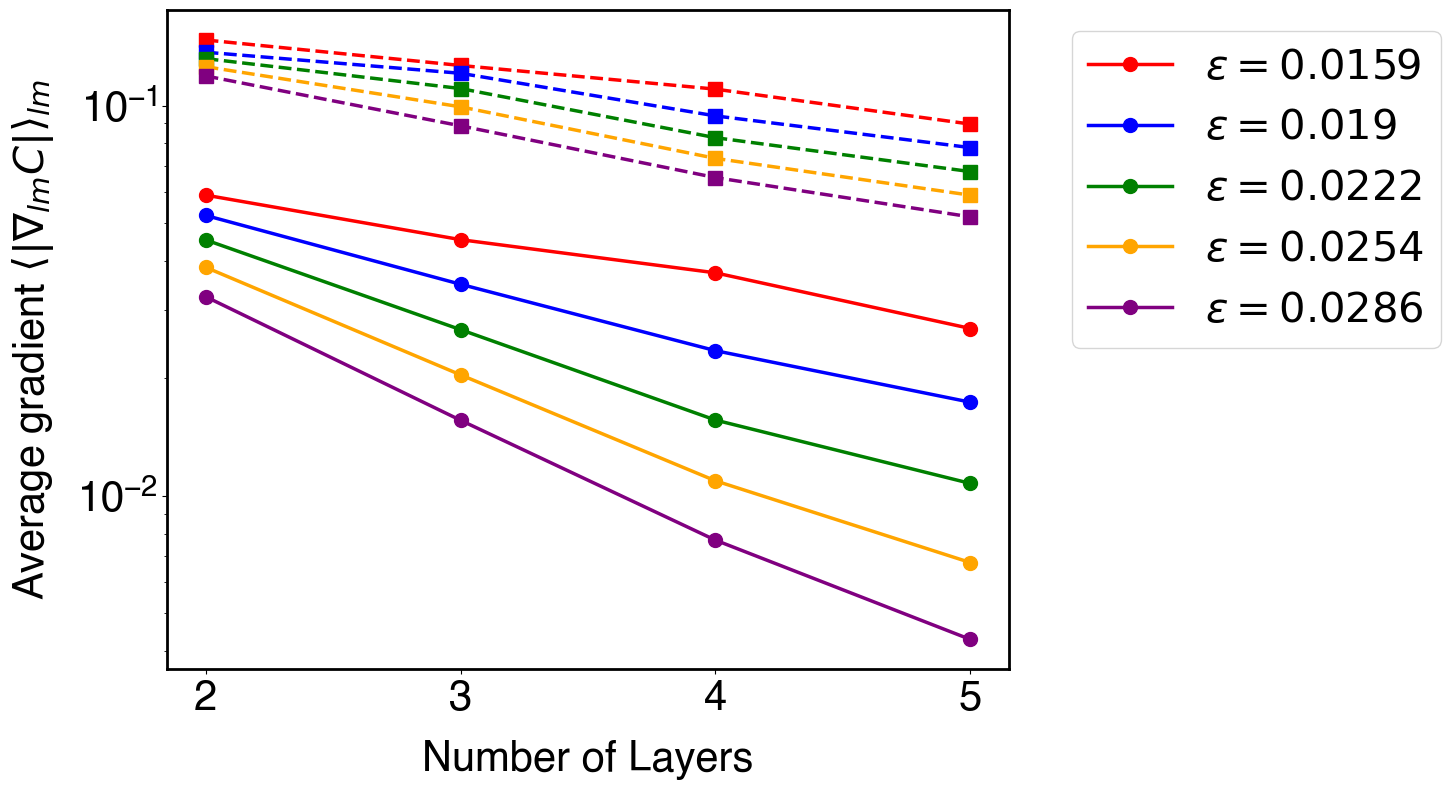

In [3]:
plt.figure(figsize=(15, 8)) 

epsilon_lst_to_plot = epsilon_lst[::2][5:10] 
for idx, epsilon in enumerate(epsilon_lst_to_plot):
     plt.plot(layer_lst, unitary_grad_first_derivative_dict[epsilon], label=fr'$\epsilon={round(epsilon, 4)}$', marker='o', 
              markersize = 10, color=colors[idx], linewidth = 2.5)
     plt.plot(layer_lst, dissipative_grad_first_derivative_dict[epsilon], marker='s', markersize = 10, linestyle='--', color=colors[idx], linewidth = 2.5)
plt.xlabel(r'Number of Layers', labelpad = 15)
plt.ylabel(r'Average gradient $\langle |\nabla_{lm} C| \rangle_{lm}$', labelpad = 15)
plt.xticks(layer_lst)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.yscale('log')
for spline in plt.gca().spines.values():
     spline.set_linewidth(2)
# path = '/Users/sasankadowarah/Ultimate_QM_MM/VQA/infinite_ranged_modular/cluster_data/'
# plt.savefig(path + 'gradients_first_derivative.png', bbox_inches='tight', dpi=600)
plt.show()

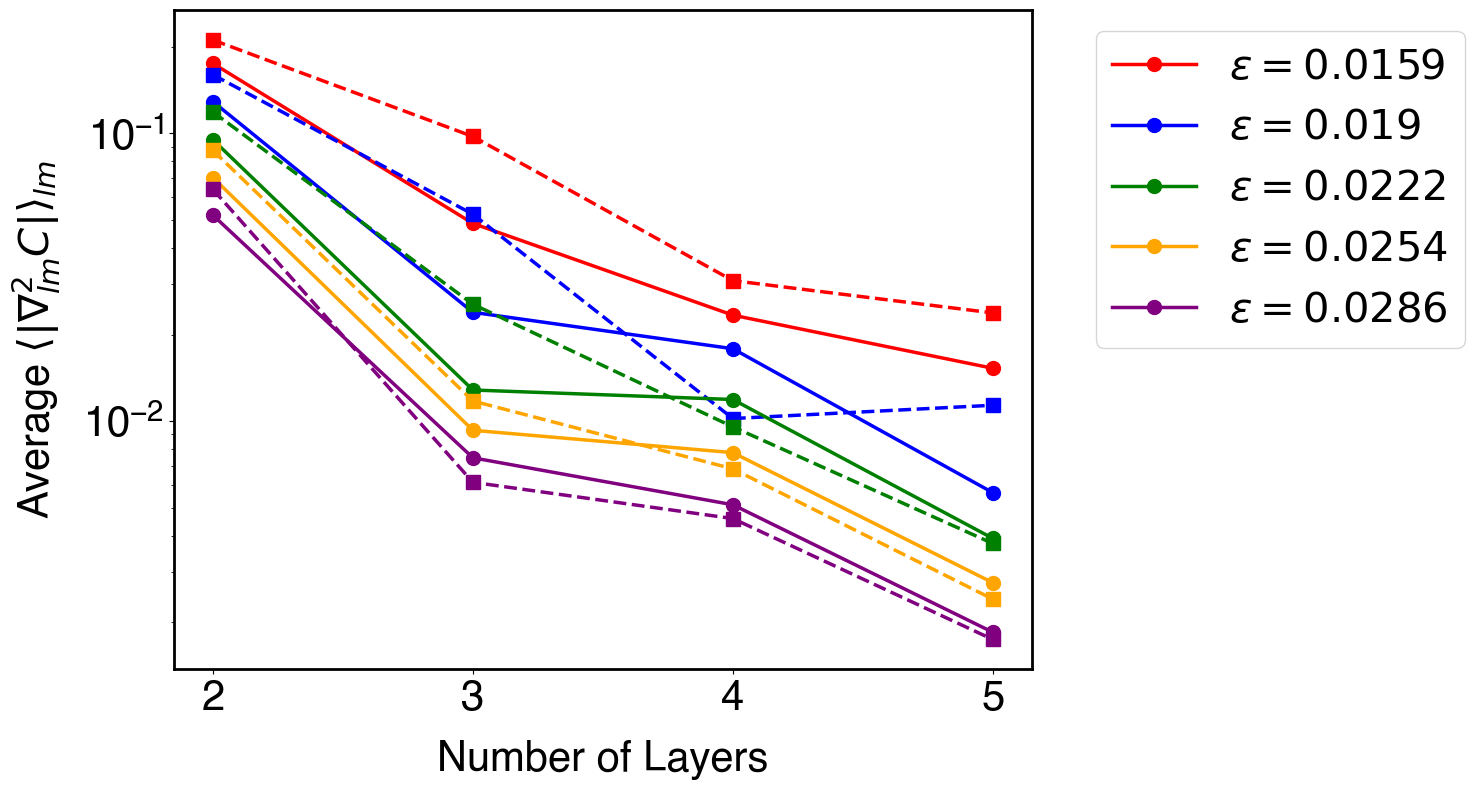

In [4]:
plt.figure(figsize=(15, 8)) 

epsilon_lst_to_plot = epsilon_lst[::2][5:10] 
for idx, epsilon in enumerate(epsilon_lst_to_plot):
     plt.plot(layer_lst, unitary_hessian_history_dict[epsilon], label=fr'$\epsilon={round(epsilon, 4)}$', marker='o', 
              markersize = 10, color=colors[idx], linewidth = 2.5)
     plt.plot(layer_lst, dissipative_hessian_history_dict[epsilon], marker='s', markersize = 10, linestyle='--', color=colors[idx], linewidth = 2.5)
plt.xlabel(r'Number of Layers', labelpad = 15)
plt.ylabel(r'Average $\langle |\nabla^{2}_{lm} C| \rangle_{lm}$', labelpad = 15)
plt.xticks(layer_lst)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.yscale('log')
for spline in plt.gca().spines.values():
     spline.set_linewidth(2)
# path = '/Users/sasankadowarah/Ultimate_QM_MM/VQA/infinite_ranged_modular/cluster_data/'
# plt.savefig(path + 'gradients_second_derivative.png', bbox_inches='tight', dpi=600)
plt.show()

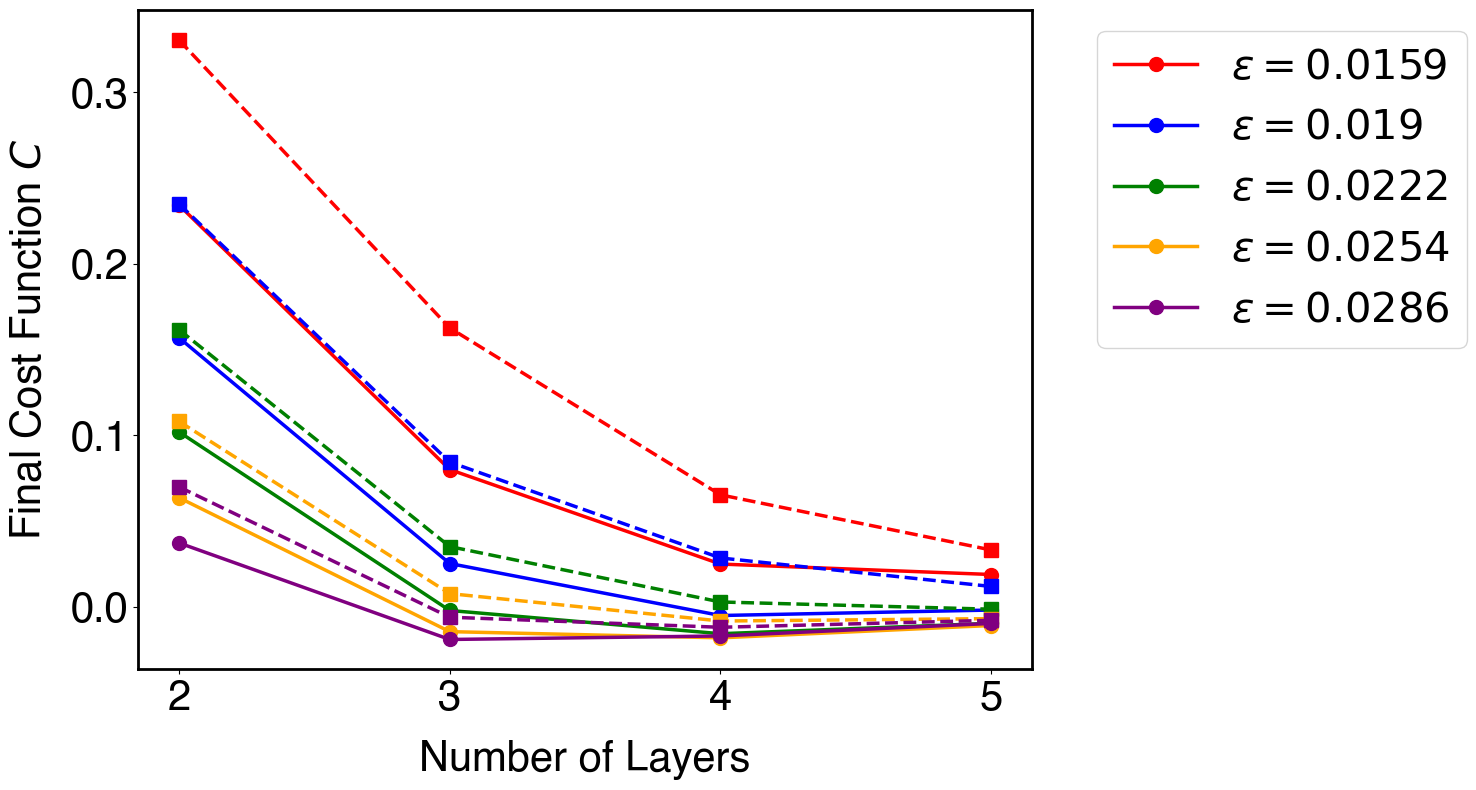

In [5]:
plt.figure(figsize=(15, 8))

epsilon_lst_to_plot = epsilon_lst[::2][5:10]
for idx, epsilon in enumerate(epsilon_lst_to_plot):
     plt.plot(layer_lst, unitary_cost_function_dict[epsilon], label=fr'$\epsilon={round(epsilon, 4)}$', marker='o', 
              markersize = 10, color=colors[idx], linewidth = 2.5)
     plt.plot(layer_lst, dissipative_cost_function_dict[epsilon], marker='s', markersize = 10, linestyle='--', color=colors[idx], linewidth = 2.5)    
plt.xlabel(r'Number of Layers', labelpad = 15)
plt.ylabel(r'Final Cost Function $C$', labelpad = 15)
plt.xticks(layer_lst)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left') 
plt.tight_layout()
for spline in plt.gca().spines.values():
     spline.set_linewidth(2)
# path = '/Users/sasankadowarah/Ultimate_QM_MM/VQA/infinite_ranged_modular/cluster_data/'
# plt.savefig(path + 'cost_function_final.png', bbox_inches='tight', dpi=600)
plt.show()

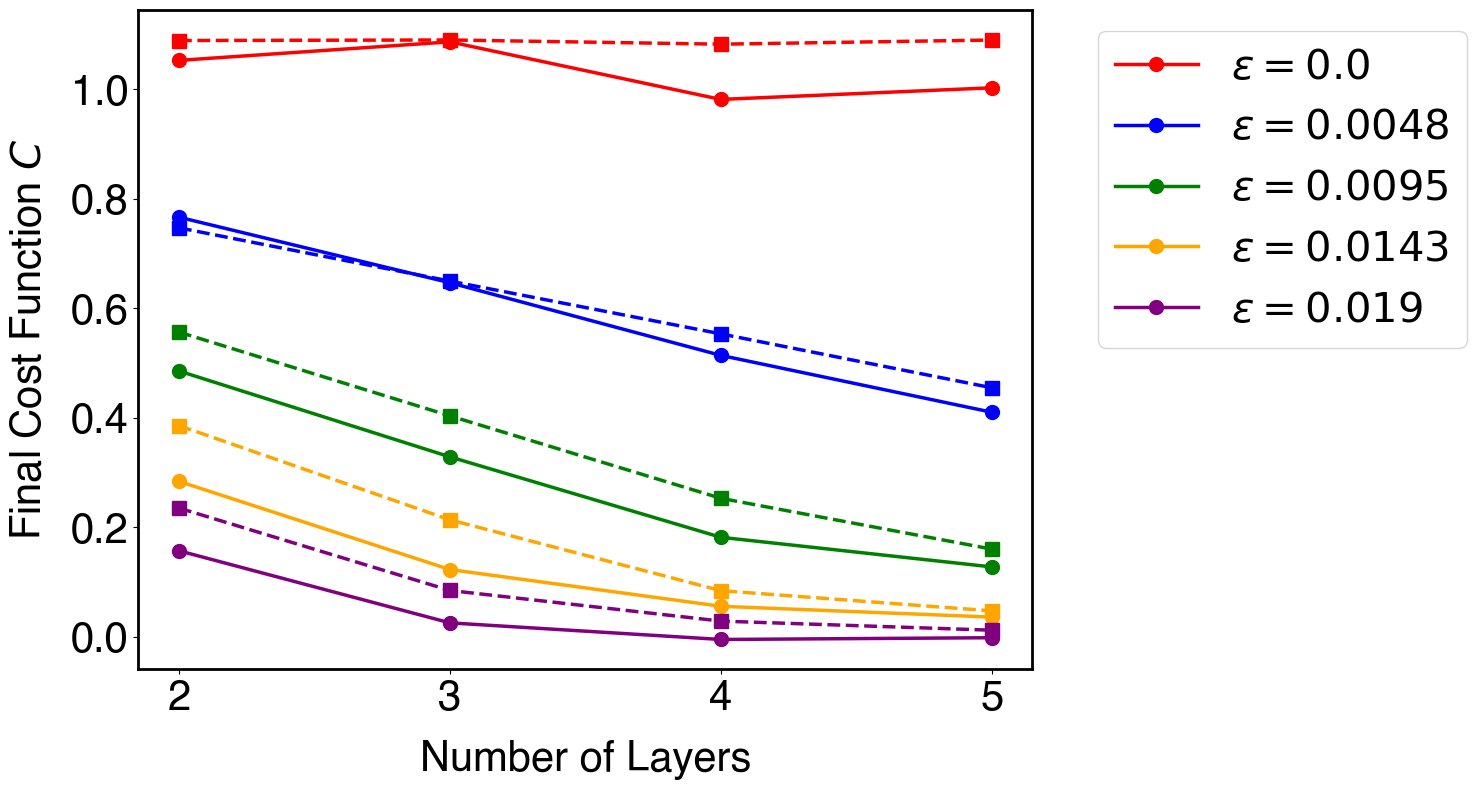

In [21]:
plt.figure(figsize=(15, 8))

epsilon_lst_to_plot = epsilon_lst[0: 15: 3]
for idx, epsilon in enumerate(epsilon_lst_to_plot):
     plt.plot(layer_lst, unitary_cost_function_dict[epsilon], label=fr'$\epsilon={round(epsilon, 4)}$', marker='o', 
              markersize = 10, color=colors[idx], linewidth = 2.5)
     plt.plot(layer_lst, dissipative_cost_function_dict[epsilon], marker='s', markersize = 10, linestyle='--', color=colors[idx], linewidth = 2.5)    
plt.xlabel(r'Number of Layers', labelpad = 15)
plt.ylabel(r'Final Cost Function $C$', labelpad = 15)
plt.xticks(layer_lst)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left') 
plt.tight_layout()
for spline in plt.gca().spines.values():
     spline.set_linewidth(2)
path = '/Users/sasankadowarah/Ultimate_QM_MM/VQA/infinite_ranged_modular/cluster_data/'
plt.savefig(path + 'cost_function_final_1.png', bbox_inches='tight', dpi=600)
plt.show()

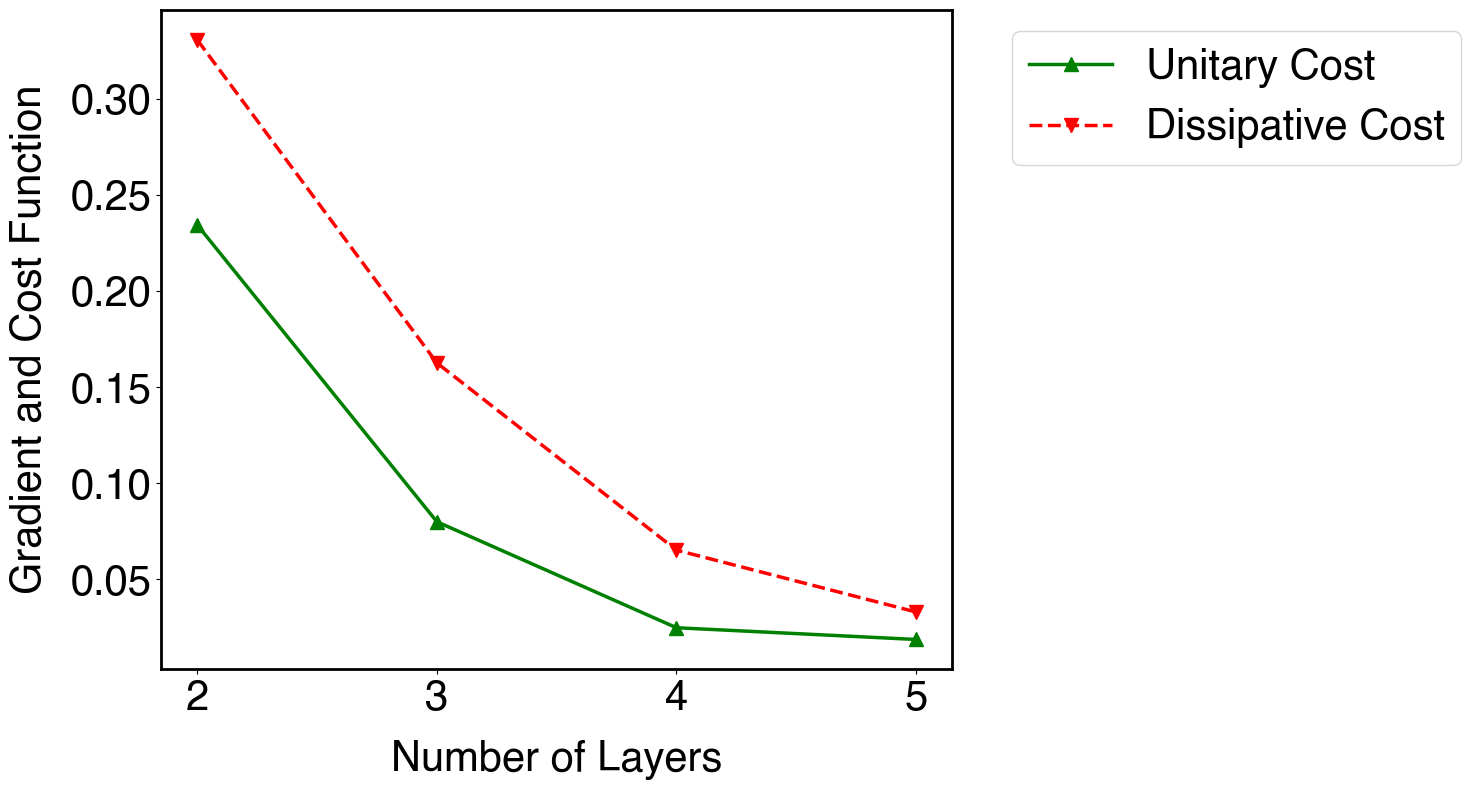

In [6]:
epsilon = epsilon_lst[10]
plt.figure(figsize=(15, 8))
plt.plot(layer_lst, unitary_cost_function_dict[epsilon], label=fr'Unitary Cost', marker='^', markersize = 10, color='green', linewidth = 2.5)
plt.plot(layer_lst, dissipative_cost_function_dict[epsilon], label=fr'Dissipative Cost', marker='v', markersize = 10, linestyle='--', color='red', linewidth = 2.5)
plt.xlabel(r'Number of Layers', labelpad = 15)
plt.ylabel(r'Gradient and Cost Function', labelpad = 15)
plt.xticks(layer_lst)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()  
for spline in plt.gca().spines.values():
     spline.set_linewidth(2)
# path = '/Users/sasankadowarah/Ultimate_QM_MM/VQA/infinite_ranged_modular/cluster_data/'
# plt.savefig(path + 'gradients_and_cost_function_epsilon_' + str(round(epsilon, 4)) + '.png', bbox_inches='tight',     
# dpi=600)
plt.show()